# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Putri Indah Sari
- **Email:** putri04213@gmail.com
- **ID Dicoding:** MC813D5X1836

## Menentukan Pertanyaan Bisnis

- Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda antara musim panas dan musim dingin dalam tahun 2011-2012?
- Apakah hari libur (holiday) memengaruhi jumlah penyewaan sepeda 2011-2012?

# Analisis Lanjutan

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Wrangling

### Gathering Data

saya mencoba melakukan import data set melalui google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
hour_df = pd.read_csv("/content/drive/MyDrive/hour.csv")
day_df = pd.read_csv("/content/drive/MyDrive/day.csv")

data berhasil terupload dan siap untuk dilakukan assesing dan cleaning data.

### Assesing data

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


insight :
- DataFrame ini memiliki 17.379 baris dan 17 kolom.
- Kolom-kolomnya terdiri dari berbagai tipe data, termasuk integer, float, dan object (teks).,
- Tidak ada nilai yang hilang (null) dalam DataFrame ini karena semua kolom memiliki 17.379 nilai non-null.
DataFramenya menggunakan sekitar 2.3 MB memori.

In [5]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


insgiht :tidak ada missing values pada dat hour

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


insight nya :Dataset ini lengkap tidak ada missing values,saya akan coba gunakan untuk analisis time series, pengaruh cuaca, dan prediksi.

In [15]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0


insght :tidak ada data duplikat shingga tidak perlu dibersihkan

In [11]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


insight pada data day tidak ada missing values,dan tidak perlu melakukan pembersihan data.

In [18]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())

Jumlah duplikasi:  0


insight data day tidak memiliki jumlah duplikasi untuk dilakukan langkah cleanong data

In [17]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [20]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Insight:
- data hour dan day sudah normal tetapi pada tipe data day dan hour ada yang salah,seharusnya dteday tipe datanya date time

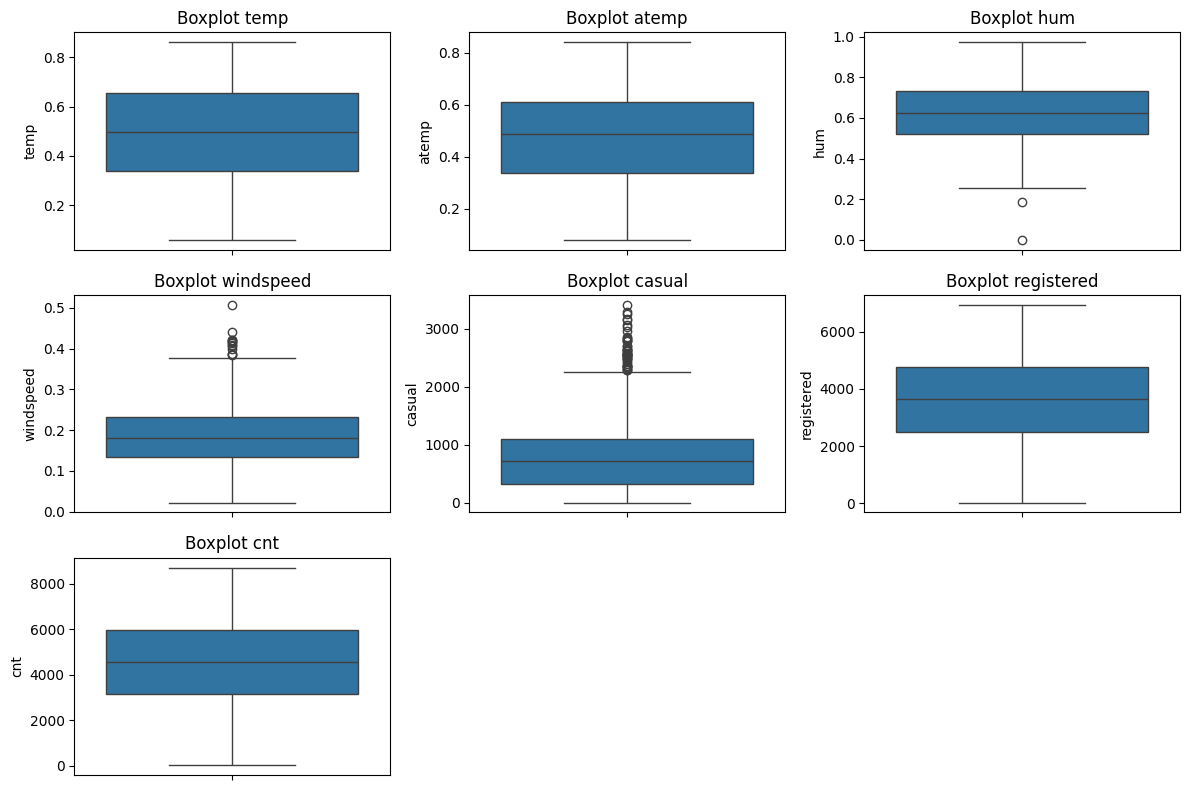

In [6]:
cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

plt.figure(figsize=(12, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=day_df[col])
    plt.title(f"Boxplot {col}")
plt.tight_layout()
plt.show()

**insight**
- terdapat outlier pada beberapa variabel yang ditunjukan yakni windspeed, casual, dan hum.langkah selanjutnya saya akan mencoba melihat isi dari outlier tersebut untuk menentukan 1.haruskah dihapus atau tetap dipertahankan sebagai data penting

In [24]:
import pandas as pd

# Fungsi deteksi outlier dengan IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
cols_with_outliers = ['windspeed', 'casual', 'hum']
for col in cols_with_outliers:
    print(f"\nOutlier pada kolom {col}:")
    print(detect_outliers_iqr(day_df, col).head())  # Menampilkan beberapa outlier pertama



Outlier pada kolom windspeed:
     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
44        45  2011-02-14       1   0     2        0        1           1   
49        50  2011-02-19       1   0     2        0        6           0   
93        94  2011-04-04       2   0     4        0        1           1   
94        95  2011-04-05       2   0     4        0        2           1   
292      293  2011-10-20       4   0    10        0        4           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
44            1  0.415000  0.398350  0.375833   0.417908     208        1705   
49            1  0.399167  0.391404  0.187917   0.507463     532        1103   
93            1  0.573333  0.542929  0.426250   0.385571     734        2381   
94            2  0.414167  0.398350  0.642083   0.388067     167        1628   
292           1  0.475833  0.466525  0.636250   0.422275     471        3724   

      cnt  
44   1913  
49   16

**insight:**
- outlier pada windspeed : nilai tertinggi seperti 0.507463 menunjukan angin sangat kencang ini bisa jadi,sehingga jika kecepatan angin berpengaruh signifikan pada jumlah penyewaan sepeda ,maka saya tetap akan mempertahankan nilai tersebut.
- outlier pada casual : nilai tertinggi 3065  menunjukkan hari dengan banyak penyewa sepeda yang bukan member (casual),bisa jadi terdapat event khusus atau akhir pekan yang sibuk .ini merupakan insight penting untuk menunjukkan tren penggunaan sepeda oleh pengguna
- outlier pada hum : terdapat nilai 0.00000 ini bisa jadi kesalahan data atau missing value yang diisi dengan nol(saya akan mengganti dengan nilai median untuk mengganti nilai tidak realistis tersebut)

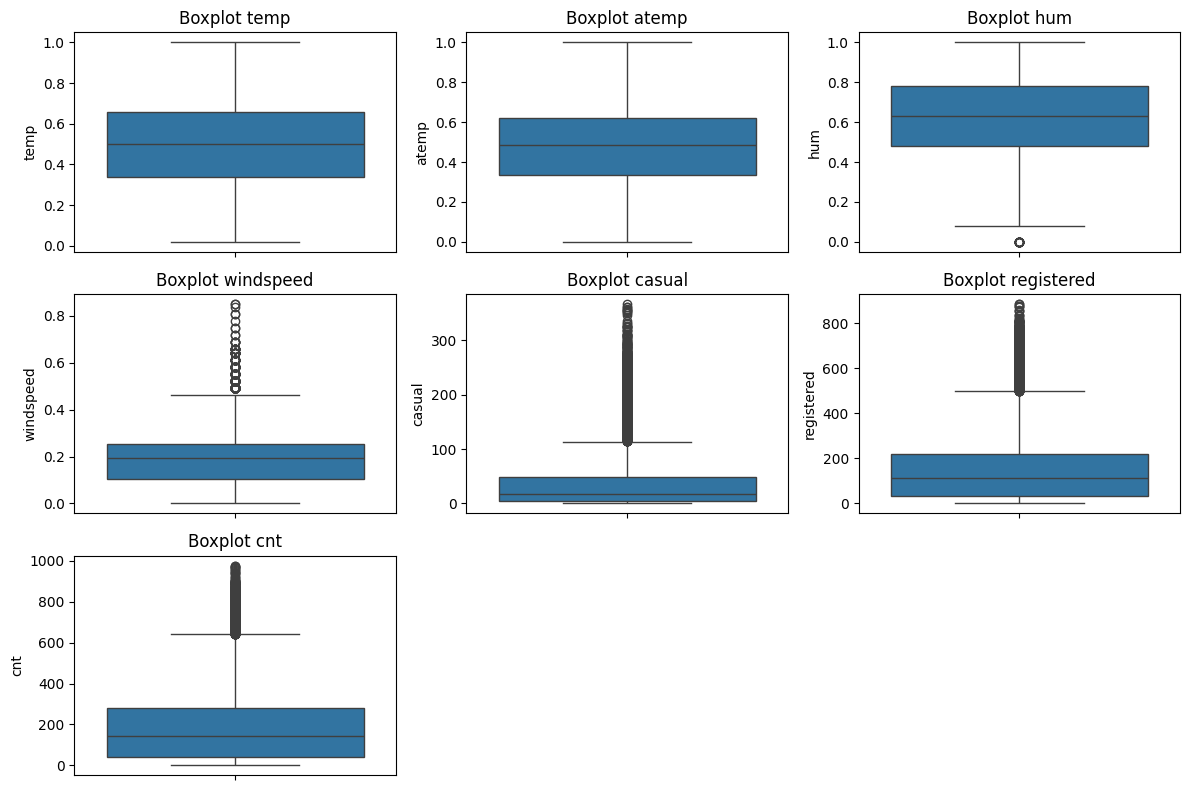

In [9]:
cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

plt.figure(figsize=(12, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=hour_df[col])
    plt.title(f"Boxplot {col}")
plt.tight_layout()
plt.show()

insight : tedapat bebarapa outlier pada beberapa  kolom cnt,windspeet,casual,registered namun outlier tersebut tetap diperlukan

In [7]:
import pandas as pd

# Daftar kolom yang akan dicek outliernya
columns_with_outliers = ['windspeed', 'casual', 'registered', 'cnt']

# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Menampilkan outlier untuk setiap kolom
for col in columns_with_outliers:
    outliers = detect_outliers_iqr(hour_df, col)
    print(f"Outlier pada kolom {col}:")
    display(outliers)  # Jika di Jupyter Notebook
    print(outliers)  # Jika di terminal
    print("\n" + "-"*50 + "\n")


Outlier pada kolom windspeed:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
175,176,2011-01-08,1,0,1,14,0,6,0,1,0.20,0.1667,0.32,0.4925,12,83,95
178,179,2011-01-08,1,0,1,17,0,6,0,1,0.16,0.1212,0.37,0.5522,5,64,69
194,195,2011-01-09,1,0,1,9,0,0,0,1,0.12,0.0758,0.46,0.5224,0,19,19
196,197,2011-01-09,1,0,1,11,0,0,0,1,0.16,0.1212,0.40,0.5224,2,47,49
265,266,2011-01-12,1,0,1,12,0,3,1,1,0.20,0.1515,0.47,0.5821,3,52,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17327,17328,2012-12-29,1,1,12,20,0,6,0,2,0.30,0.2424,0.56,0.5522,2,64,66
17328,17329,2012-12-29,1,1,12,21,0,6,0,2,0.28,0.2424,0.56,0.4925,4,56,60
17341,17342,2012-12-30,1,1,12,10,0,0,0,1,0.26,0.2121,0.41,0.5821,31,91,122
17343,17344,2012-12-30,1,1,12,12,0,0,0,1,0.28,0.2273,0.36,0.5821,47,97,144


       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
175        176  2011-01-08       1   0     1  14        0        6   
178        179  2011-01-08       1   0     1  17        0        6   
194        195  2011-01-09       1   0     1   9        0        0   
196        197  2011-01-09       1   0     1  11        0        0   
265        266  2011-01-12       1   0     1  12        0        3   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17327    17328  2012-12-29       1   1    12  20        0        6   
17328    17329  2012-12-29       1   1    12  21        0        6   
17341    17342  2012-12-30       1   1    12  10        0        0   
17343    17344  2012-12-30       1   1    12  12        0        0   
17344    17345  2012-12-30       1   1    12  13        0        0   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
175             0           1  0.20  0.1667  0.32     0.4925      12   
178            

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1633,1634,2011-03-13,1,0,3,14,0,0,0,1,0.46,0.4545,0.41,0.2985,144,106,250
1634,1635,2011-03-13,1,0,3,15,0,0,0,1,0.48,0.4697,0.39,0.3284,149,155,304
1635,1636,2011-03-13,1,0,3,16,0,0,0,1,0.46,0.4545,0.41,0.3881,124,132,256
1771,1772,2011-03-19,1,0,3,12,0,6,0,1,0.46,0.4545,0.33,0.4179,126,141,267
1772,1773,2011-03-19,1,0,3,13,0,6,0,1,0.50,0.4848,0.34,0.4627,174,127,301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16817,16818,2012-12-08,4,1,12,12,0,6,0,2,0.40,0.4091,0.87,0.2239,122,364,486
16818,16819,2012-12-08,4,1,12,13,0,6,0,2,0.40,0.4091,0.87,0.1642,148,399,547
16819,16820,2012-12-08,4,1,12,14,0,6,0,2,0.40,0.4091,0.87,0.2836,164,378,542
16820,16821,2012-12-08,4,1,12,15,0,6,0,1,0.42,0.4242,0.82,0.1642,167,374,541


       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
1633      1634  2011-03-13       1   0     3  14        0        0   
1634      1635  2011-03-13       1   0     3  15        0        0   
1635      1636  2011-03-13       1   0     3  16        0        0   
1771      1772  2011-03-19       1   0     3  12        0        6   
1772      1773  2011-03-19       1   0     3  13        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
16817    16818  2012-12-08       4   1    12  12        0        6   
16818    16819  2012-12-08       4   1    12  13        0        6   
16819    16820  2012-12-08       4   1    12  14        0        6   
16820    16821  2012-12-08       4   1    12  15        0        6   
16821    16822  2012-12-08       4   1    12  16        0        6   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
1633            0           1  0.46  0.4545  0.41     0.2985     144   
1634           

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2995,2996,2011-05-09,2,0,5,17,0,1,1,1,0.62,0.6212,0.38,0.2537,59,539,598
3019,3020,2011-05-10,2,0,5,17,0,2,1,1,0.64,0.6212,0.33,0.0000,79,532,611
3067,3068,2011-05-12,2,0,5,17,0,4,1,2,0.64,0.6212,0.57,0.1940,54,540,594
3187,3188,2011-05-17,2,0,5,17,0,2,1,1,0.62,0.6061,0.65,0.4179,83,521,604
3379,3380,2011-05-25,2,0,5,17,0,3,1,1,0.74,0.6667,0.51,0.2239,77,524,601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17063,17064,2012-12-18,4,1,12,18,0,2,1,1,0.38,0.3939,0.46,0.3284,13,512,525
17077,17078,2012-12-19,4,1,12,8,0,3,1,1,0.24,0.2576,0.87,0.1045,13,665,678
17086,17087,2012-12-19,4,1,12,17,0,3,1,1,0.40,0.4091,0.50,0.3881,26,536,562
17087,17088,2012-12-19,4,1,12,18,0,3,1,1,0.38,0.3939,0.50,0.3582,23,546,569


       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
2995      2996  2011-05-09       2   0     5  17        0        1   
3019      3020  2011-05-10       2   0     5  17        0        2   
3067      3068  2011-05-12       2   0     5  17        0        4   
3187      3188  2011-05-17       2   0     5  17        0        2   
3379      3380  2011-05-25       2   0     5  17        0        3   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17063    17064  2012-12-18       4   1    12  18        0        2   
17077    17078  2012-12-19       4   1    12   8        0        3   
17086    17087  2012-12-19       4   1    12  17        0        3   
17087    17088  2012-12-19       4   1    12  18        0        3   
17101    17102  2012-12-20       4   1    12   8        0        4   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
2995            1           1  0.62  0.6212  0.38     0.2537      59   
3019           

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5536,5537,2011-08-23,3,0,8,14,0,2,1,1,0.72,0.6515,0.30,0.0896,149,502,651
10358,10359,2012-03-12,1,1,3,17,0,1,1,2,0.62,0.6212,0.38,0.4179,87,557,644
10359,10360,2012-03-12,1,1,3,18,0,1,1,2,0.60,0.6212,0.43,0.1940,89,623,712
10382,10383,2012-03-13,1,1,3,17,0,2,1,1,0.70,0.6364,0.37,0.1045,62,614,676
10383,10384,2012-03-13,1,1,3,18,0,2,1,1,0.70,0.6364,0.34,0.2985,96,638,734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16885,16886,2012-12-11,4,1,12,8,0,2,1,2,0.34,0.3030,0.61,0.2985,16,708,724
16909,16910,2012-12-12,4,1,12,8,0,3,1,2,0.26,0.2576,0.65,0.1642,18,670,688
16933,16934,2012-12-13,4,1,12,8,0,4,1,1,0.24,0.2273,0.60,0.1940,24,655,679
17053,17054,2012-12-18,4,1,12,8,0,2,1,1,0.38,0.3939,0.94,0.0000,10,652,662


       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
5536      5537  2011-08-23       3   0     8  14        0        2   
10358    10359  2012-03-12       1   1     3  17        0        1   
10359    10360  2012-03-12       1   1     3  18        0        1   
10382    10383  2012-03-13       1   1     3  17        0        2   
10383    10384  2012-03-13       1   1     3  18        0        2   
...        ...         ...     ...  ..   ...  ..      ...      ...   
16885    16886  2012-12-11       4   1    12   8        0        2   
16909    16910  2012-12-12       4   1    12   8        0        3   
16933    16934  2012-12-13       4   1    12   8        0        4   
17053    17054  2012-12-18       4   1    12   8        0        2   
17077    17078  2012-12-19       4   1    12   8        0        3   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
5536            1           1  0.72  0.6515  0.30     0.0896     149   
10358          

insight : Lonjakan jumlah pengguna kasual menunjukkan adanya pola musiman atau kejadian spesifik yang meningkatkan permintaan sepeda. Hal ini bisa dimanfaatkan untuk strategi pemasaran seperti diskon di hari libur atau promosi event tertentu,sehingga saya memilih untuk mempertahankan outlier tersebut tanpa proses cleaning lanjutan.



### Cleaning Data

In [30]:

# Hapus baris dengan humidity (hum) = 0 karena tidak masuk akal
day_df_clean = day_df[day_df['hum'] > 0].copy()

# Atau ganti nilai 0 dengan median humidity
day_df['hum'] = day_df['hum'].replace(0, day_df['hum'].median())

# Cek jumlah data setelah pembersihan
print(f"Jumlah data setelah pembersihan: {len(day_df_clean)}")


Jumlah data setelah pembersihan: 731


**insight**:

Mengganti nilai 0 pada hum dengan median dari kolom tersebut.

In [33]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [34]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Insight:

- menganti tipe data data hour dan day menjadi datetime

## Exploratory Data Analysis (EDA)

- Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda antara musim panas dan musim dingin dalam tahun 2011-2012?
- Apakah hari libur (holiday) memengaruhi jumlah penyewaan sepeda 2011-2012?

# eksplore pertanyaan 1:

<ipython-input-16-fdf7cad0182f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=day_df['season'], y=day_df['cnt'], palette="coolwarm")


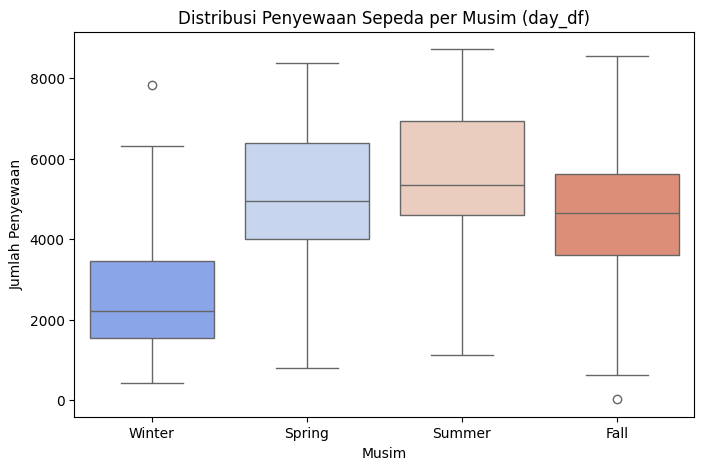

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=day_df['season'], y=day_df['cnt'], palette="coolwarm")
plt.xticks([0, 1, 2, 3], ['Winter', 'Spring', 'Summer', 'Fall'])
plt.title("Distribusi Penyewaan Sepeda per Musim (day_df)")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.show()

Insight :
- pada musim dingin karena jumlah penyewaan cenderung rendah, perusahaan dapat menawarkan diskon atau promosi khusus agar tetap menarik pengguna.
- Menyediakan lebih banyak sepeda selama musim semi, panas, dan gugur untuk mengakomodasi permintaan tinggi.
-  Perusahaan dapat menyesuaikan jumlah sepeda yang tersedia berdasarkan pola musiman ini untuk meningkatkan efisiensi operasional.

<ipython-input-5-d77a41ba0918>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season_label', y='cnt', data=summer_winter_df, palette='coolwarm')


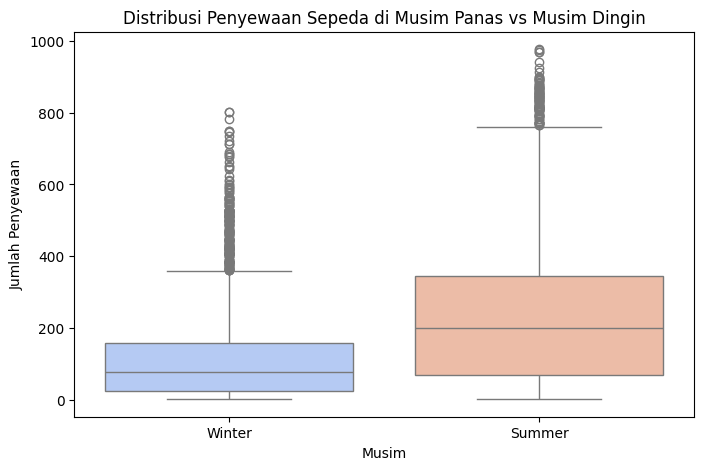

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
hour_df['season_label'] = hour_df['season'].map(season_mapping)

# 1. Analisis perbedaan jumlah penyewaan sepeda antara musim panas dan musim dingin
summer_winter_df = hour_df[hour_df['season'].isin([1, 3])]
plt.figure(figsize=(8, 5))
sns.boxplot(x='season_label', y='cnt', data=summer_winter_df, palette='coolwarm')
plt.title('Distribusi Penyewaan Sepeda di Musim Panas vs Musim Dingin')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Eksplore data hour

In [12]:
import seaborn as sns
from scipy.stats import ttest_ind

winter_rentals = day_df[day_df['season'] == 1]['cnt']
summer_rentals = day_df[day_df['season'] == 3]['cnt']

print(f"Rata-rata penyewaan sepeda di musim dingin: {winter_rentals.mean():.2f}")
print(f"Rata-rata penyewaan sepeda di musim panas: {summer_rentals.mean():.2f}")


Rata-rata penyewaan sepeda di musim dingin: 2604.13
Rata-rata penyewaan sepeda di musim panas: 5644.30


In [16]:
t_stat, p_value = ttest_ind(winter_rentals, summer_rentals, equal_var=False)
print(f"T-Test antara Musim Dingin dan Musim Panas: p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Terdapat perbedaan signifikan dalam penyewaan sepeda antara musim dingin dan musim panas.")
else:
    print("Tidak ada perbedaan signifikan dalam penyewaan sepeda antara musim dingin dan musim panas.")

T-Test antara Musim Dingin dan Musim Panas: p-value = 0.0000
Terdapat perbedaan signifikan dalam penyewaan sepeda antara musim dingin dan musim panas.


**Insight:**
pertanyaan 1 perbedaan signifikan dalam jumlah penyewaan sepeda antara musim panas dan musim dingin dalam tahun 2011-2012:
-  Rata-rata penyewaan sepeda di musim panas (5644.30) lebih dari dua kali lipat dibandingkan dengan musim dingin (2604.13) sehingga musim panas periode paling populer dan disarankan untuk menambah jumlah sepeda.
- Cuaca yang lebih hangat dan cerah di musim panas cenderung mendorong orang untuk lebih banyak bersepeda, sementara cuaca dingin dan kondisi jalan yang kurang mendukung di musim dingin mengurangi minat penyewaan sepeda
- Hasil T-Test menunjukkan p-value = 0.0000, yang mengindikasikan bahwa perbedaan antara kedua musim tersebut sangat signifikan secara statistik (musim sangat berpengaruh pada tingkat penyewaan sepeda)
- perusahaan penyewaan perlu mempertimbangkan strategi operasional dan pemasaran terhadap perbedaan musim dengan meawarkan diskon/layanan tambahan selama musim dingin.

# eksplore pertanyaan 2 :

<ipython-input-11-444b827a1ce4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=day_df['holiday'], y=day_df['cnt'], palette="pastel")


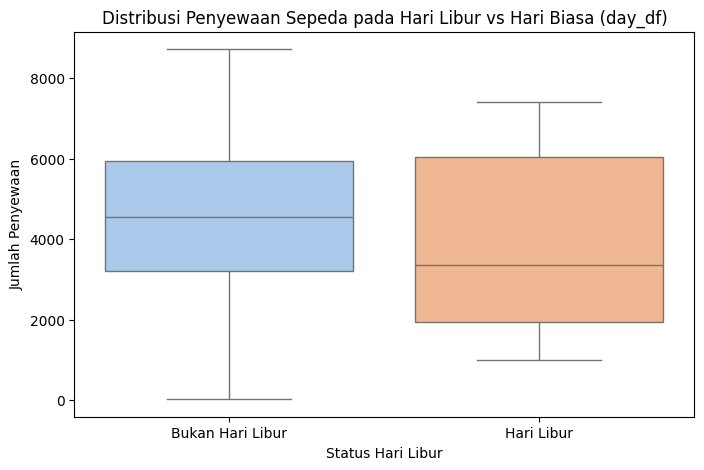

In [11]:
### 2. Pengaruh Hari Libur terhadap Penyewaan Sepeda
plt.figure(figsize=(8, 5))
sns.boxplot(x=day_df['holiday'], y=day_df['cnt'], palette="pastel")
plt.xticks([0, 1], ['Bukan Hari Libur', 'Hari Libur'])
plt.title("Distribusi Penyewaan Sepeda pada Hari Libur vs Hari Biasa (day_df)")
plt.xlabel("Status Hari Libur")
plt.ylabel("Jumlah Penyewaan")
plt.show()

In [15]:
### rata-rata penyewaan pada hari libur dan bukan hari libur
holiday_rentals = day_df[day_df['holiday'] == 1]['cnt']
non_holiday_rentals = day_df[day_df['holiday'] == 0]['cnt']
print(f"Rata-rata penyewaan sepeda pada hari libur: {holiday_rentals.mean():.2f}")
print(f"Rata-rata penyewaan sepeda pada hari biasa: {non_holiday_rentals.mean():.2f}")

Rata-rata penyewaan sepeda pada hari libur: 3735.00
Rata-rata penyewaan sepeda pada hari biasa: 4527.10


In [16]:
t_stat, p_value = ttest_ind(holiday_rentals, non_holiday_rentals, equal_var=False)
print(f"T-Test antara Hari Libur dan Hari Biasa: p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Terdapat perbedaan signifikan dalam penyewaan sepeda pada hari libur dan hari biasa.")
else:
    print("Tidak ada perbedaan signifikan dalam penyewaan sepeda pada hari libur dan hari biasa.")


T-Test antara Hari Libur dan Hari Biasa: p-value = 0.1030
Tidak ada perbedaan signifikan dalam penyewaan sepeda pada hari libur dan hari biasa.


eksplore data hour

<ipython-input-22-2b817ca4b80f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='holiday', y='cnt', data=hour_df, palette='Set2')


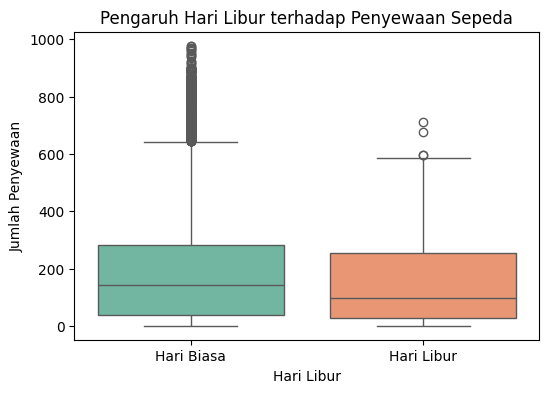

Rata-rata penyewaan pada hari biasa: 190.43
Rata-rata penyewaan pada hari libur: 156.87


In [22]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='holiday', y='cnt', data=hour_df, palette='Set2')
plt.xticks([0, 1], ['Hari Biasa', 'Hari Libur'])
plt.title('Pengaruh Hari Libur terhadap Penyewaan Sepeda')
plt.xlabel('Hari Libur')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Perbedaan rata-rata penyewaan antara hari libur dan hari biasa
avg_rentals = hour_df.groupby('holiday')['cnt'].mean()
print(f"Rata-rata penyewaan pada hari biasa: {avg_rentals[0]:.2f}")
print(f"Rata-rata penyewaan pada hari libur: {avg_rentals[1]:.2f}")


**Insight:**
pertanyaan 2 perbedaan signifikan dalam jumlah penyewaan sepeda dihari biasa dan hari libur/holiday dalam tahun 2011-2012:
1. pada hasil analisis data dapat disimpulkan jika hari libur (holiday) tidak secara signifikan memengaruhi jumlah penyewaan sepeda karena
-  Rata-rata penyewaan sepeda pada hari biasa (190.43) lebih tinggi dibandingkan dengan hari libur (156.87) tidak menunjukan perbedaan signifikan.
- Hasil T-Test menunjukkan p-value = 0.1030, yang lebih tinggi dari tingkat signifikansi umum 0.05. Ini mengindikasikan bahwa tidak ada perbedaan yang signifikan secara statistik dalam jumlah penyewaan sepeda antara hari libur dan hari biasa.
- Pada hari biasa, rutinitas seperti pergi bekerja atau bersekolah mungkin mendorong orang untuk menyewa sepeda sebagai alat transportasi. Sementara itu, pada hari libur, orang mungkin lebih memilih untuk beristirahat atau melakukan aktivitas lain yang tidak melibatkan bersepeda.
- jika ingin meningkatkan jumlah penyewaan maka tempat penyewaan sepeda harus mempertimbangkan promosi namun  juga tidak perlu mengubah strategi secara drastis berdasarkan status hari (libur atau biasa) karena tidak ada perbedaan signifikan pada penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda antara musim panas dan musim dingin dalam tahun 2011-2012?

scatter plot untuk melihat hubungan antara suhu (temp) dan jumlah penyewaan sepeda

---



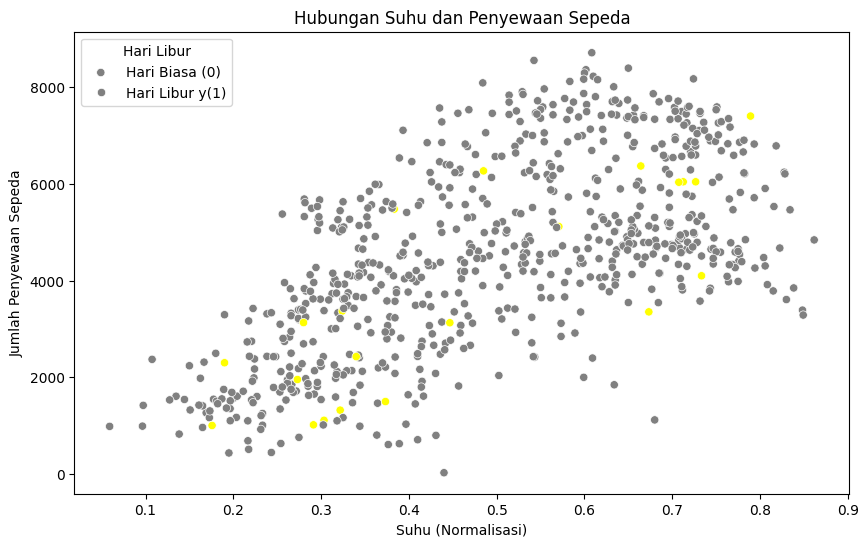

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', hue='holiday', data=day_df , palette={0: 'grey', 1: 'yellow'})
plt.title('Hubungan Suhu dan Penyewaan Sepeda')
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Hari Libur', labels=['Hari Biasa (0)', 'Hari Libur y(1)'])
plt.show()

bar plot untuk melihat pengaruh cuaca (weathersit) terhadap penyewaan sepeda

---



<ipython-input-11-1d6c7ef5bd17>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=hour_df, ci=None)


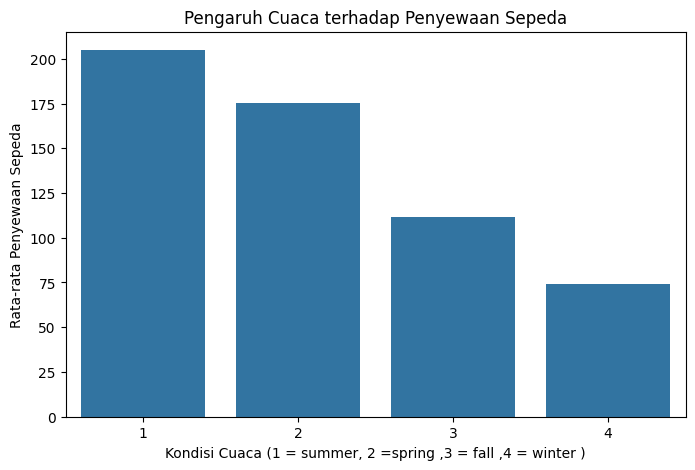

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(x='weathersit', y='cnt', data=hour_df, ci=None)
plt.title('Pengaruh Cuaca terhadap Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca (1 = summer, 2 =spring ,3 = fall ,4 = winter )')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()

### Pertanyaan 2:

Visualisasi Distribusi Penyewaan Sepeda pada Hari Libur vs Hari Biasa (day_df)

bar plot untuk membandingkan rata-rata penyewaan

---

<ipython-input-8-ae5eb8570701>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='holiday', y='cnt', data=day_df, estimator=sum, ci=None)


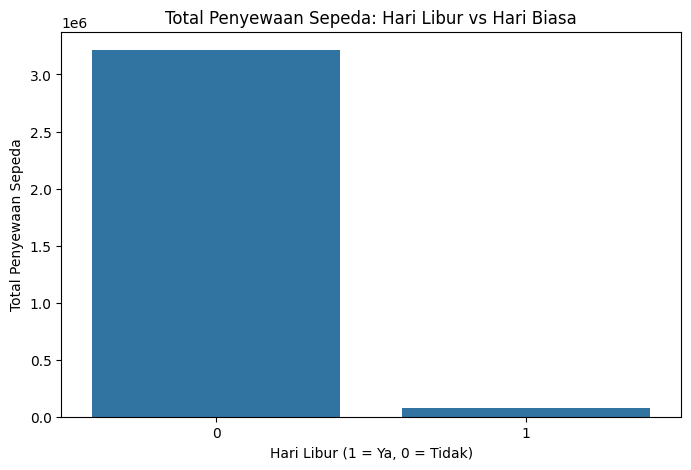

In [8]:
plt.figure(figsize=(8, 5))
sns.barplot(x='holiday', y='cnt', data=day_df, estimator=sum, ci=None)
plt.title('Total Penyewaan Sepeda: Hari Libur vs Hari Biasa')
plt.xlabel('Hari Libur (1 = Ya, 0 = Tidak)')
plt.ylabel('Total Penyewaan Sepeda')
plt.show()

box plot untuk melihat distribusi penyewaan sepeda pada hari libur dan hari biasa

---



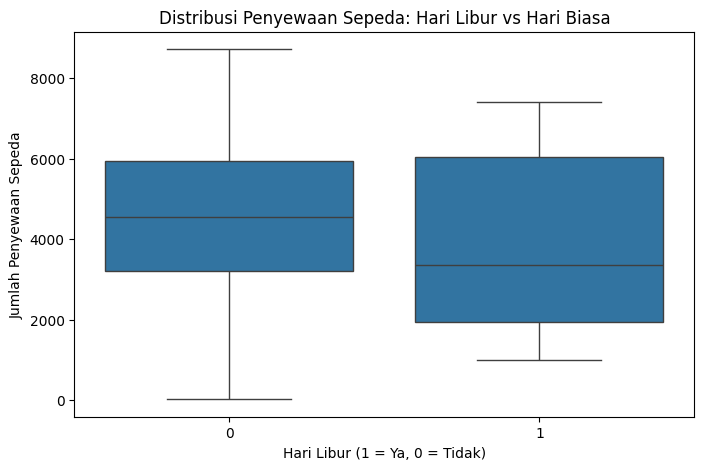

In [5]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='holiday', y='cnt', data=day_df)
plt.title('Distribusi Penyewaan Sepeda: Hari Libur vs Hari Biasa')
plt.xlabel('Hari Libur (1 = Ya, 0 = Tidak)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

Insight:
- Hari Biasa: Rata-rata penyewaan sepeda lebih tinggi pada hari biasa, kemungkinan karena rutinitas harian seperti pergi kerja atau sekolah.
- Hari Libur: Penyewaan sepeda cenderung lebih rendah, mungkin karena orang lebih memilih untuk beristirahat atau melakukan aktivitas lain.
- Hasil T-Test (p-value = 0.1030) menunjukkan bahwa perbedaan ini tidak signifikan secara statistik.

rekomendasi : tempat penyewaan sepeda dapat mempertimbangkan untuk menawarkan promosi atau layanan khusus pada hari libur untuk meningkatkan minat penyewaan, meskipun perbedaannya tidak terlalu besar.



line plot untuk melihat pola penyewaan sepeda per jam pada hari libur dan hari biasa.

---



<ipython-input-6-b459f12cf8e7>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', hue='holiday', data=hour_df, ci=None)


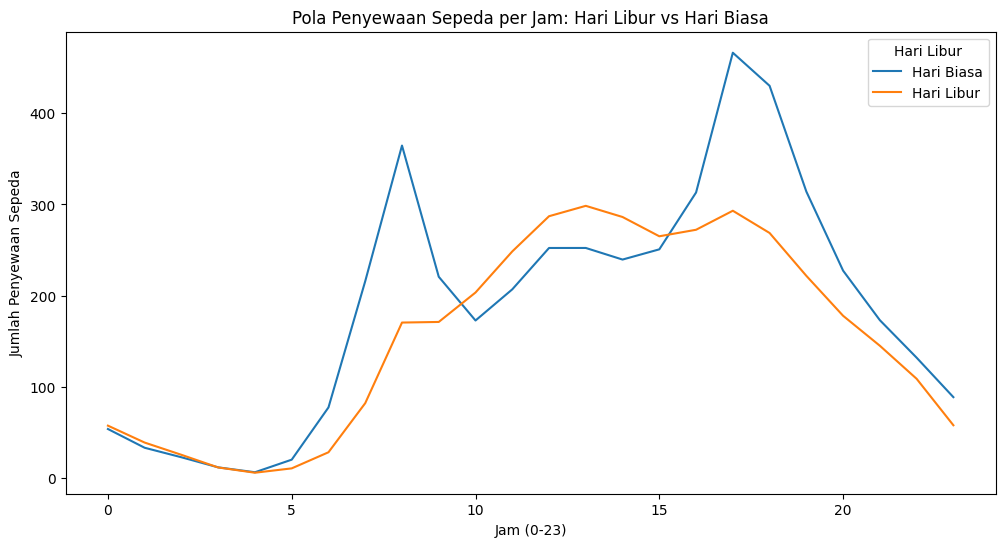

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', hue='holiday', data=hour_df, ci=None)
plt.title('Pola Penyewaan Sepeda per Jam: Hari Libur vs Hari Biasa')
plt.xlabel('Jam (0-23)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Hari Libur', labels=['Hari Biasa', 'Hari Libur'])
plt.show()

heatmap untuk melihat korelasi antara jam, hari libur, dan jumlah penyewaan.

---



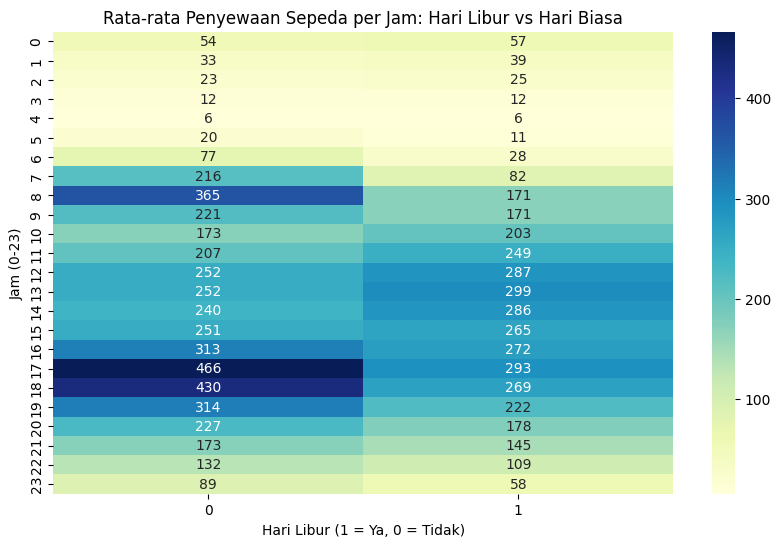

In [7]:
hour_pivot = hour_df.pivot_table(index='hr', columns='holiday', values='cnt', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(hour_pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Rata-rata Penyewaan Sepeda per Jam: Hari Libur vs Hari Biasa')
plt.xlabel('Hari Libur (1 = Ya, 0 = Tidak)')
plt.ylabel('Jam (0-23)')
plt.show()

Insight :
- Pola Harian: Pada hari biasa, terdapat dua puncak penyewaan sepeda, yaitu pada pagi hari (jam 7-9) dan sore hari (jam 16-19), yang kemungkinan terkait dengan jam berangkat dan pulang kerja/sekolah.
- Hari Libur: Pola penyewaan lebih merata sepanjang hari, dengan puncak yang lebih rendah dibandingkan hari biasa.
- Perbedaan Jam Sibuk: Hari biasa memiliki jam sibuk yang jelas, sedangkan hari libur tidak memiliki pola yang sama.

## Conclusion

- Conclution pertanyaan 1

Berdasarkan analisis data penyewaan sepeda pada tahun 2011-2012, terdapat perbedaan signifikan dalam jumlah penyewaan sepeda antara musim panas dan musim dingin. Musim panas memiliki rata-rata penyewaan sepeda yang lebih tinggi (5644,30) dibandingkan musim dingin (2604,13). Perbedaan ini secara statistik signifikan dengan p-value 0,0000. Oleh karena itu, perusahaan penyewaan sepeda dapat memfokuskan strategi pemasaran dan penambahan stok selama musim panas untuk memaksimalkan pendapatan.

- Conclution pertanyaan 2

Berdasarkan analisis data penyewaan sepeda pada tahun 2011-2012, hari libur tidak secara signifikan memengaruhi jumlah penyewaan sepeda. Rata-rata penyewaan sepeda pada hari biasa (4527,10) tidak berbeda secara signifikan dengan hari libur (3735,00) dengan p-value 0,1030. Oleh karena itu, perusahaan penyewaan sepeda tidak perlu mengubah strategi secara drastis berdasarkan hari libur, namun dapat menawarkan promosi atau layanan khusus pada hari libur untuk meningkatkan minat penyewaan.

